In [1]:
pip install gymnasium

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [107]:
import gymnasium as gym
import pygame
import numpy as np
import matplotlib.pyplot as plt

In [97]:
pygame.init()
env = gym.make("CartPole-v1", render_mode="human")

In [98]:
env

<TimeLimit<OrderEnforcing<PassiveEnvChecker<CartPoleEnv<CartPole-v1>>>>>

In [99]:
obs_space = env.observation_space
action_space = env.action_space

print("The observation space: {}".format(obs_space))
print("The action space: {}".format(action_space))

The observation space: Box([-4.8               -inf -0.41887903        -inf], [4.8               inf 0.41887903        inf], (4,), float32)
The action space: Discrete(2)


In [100]:
state, info = env.reset(seed=123, options={"low": -0.1, "high": 0.1})
# state, info = env.reset()

print("The initial state is {}".format(state))

The initial state is [ 0.03647037 -0.0892358  -0.05592803 -0.06312564]


In [101]:
num_steps = 100
total_reward_steps = 0
cumulative_rewards_steps = []

done = False
for step in range(num_steps):
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            env.close()
            pygame.quit()
            exit()
            
    random_action = env.action_space.sample()
    new_obs, reward, terminated, truncated, info = env.step(random_action)
    
    total_reward_steps += reward
    cumulative_rewards_steps.append(total_reward_steps)
    
    if terminated or truncated:
        print(f"Episode finished after {step+1} steps.")
        state, info = env.reset()

Episode finished after 15 steps.
Episode finished after 28 steps.
Episode finished after 41 steps.
Episode finished after 59 steps.
Episode finished after 72 steps.


In [102]:
print(f"Total reward for {num_steps} steps approach: {total_reward_steps}")

env.close()
pygame.quit()

Total reward for 100 steps approach: 100.0


In [103]:
pygame.init()
env = gym.make("CartPole-v1", render_mode="human")

In [104]:
num_episodes = 10
total_reward_episodes = 0
cumulative_rewards_episodes = []

for episode in range(num_episodes):
    state, info = env.reset()
    
    done = False
    steps_in_episode = 0
    episode_reward = 0
    
    while not done:
        for event in pygame.event.get():
            if event.type == pygame.QUIT:
                env.close()
                pygame.quit()
                exit()
        
        random_action = env.action_space.sample()
        new_obs, reward, terminated, truncated, info = env.step(random_action)
        
        episode_reward += reward
        steps_in_episode += 1

        if terminated or truncated:
            print(f"Episode {episode + 1} finished after {steps_in_episode} steps.")
            break
        
    total_reward_episodes += episode_reward
    cumulative_rewards_episodes.append(total_reward_episodes)

Episode 1 finished after 24 steps.
Episode 2 finished after 32 steps.
Episode 3 finished after 14 steps.
Episode 4 finished after 27 steps.
Episode 5 finished after 12 steps.
Episode 6 finished after 30 steps.
Episode 7 finished after 18 steps.
Episode 8 finished after 42 steps.
Episode 9 finished after 18 steps.
Episode 10 finished after 12 steps.


In [105]:
print(f"Total reward for {num_episodes} episodes approach: {total_reward_episodes}")

env.close()
pygame.quit()

Total reward for 10 episodes approach: 229.0


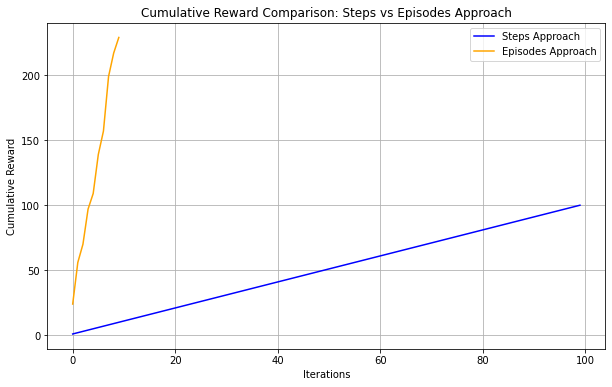

In [108]:
plt.figure(figsize=(10, 6))

plt.plot(range(num_steps), cumulative_rewards_steps, label="Steps Approach", color='blue')
plt.plot(range(num_episodes), cumulative_rewards_episodes, label="Episodes Approach", color='orange')

plt.xlabel("Iterations")
plt.ylabel("Cumulative Reward")
plt.title("Cumulative Reward Comparison: Steps vs Episodes Approach")
plt.legend()

plt.grid(True)
plt.show()